In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Load the Dataset**

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset into a Pandas DataFrame
file_path = "/content/drive/MyDrive/AI /cwurData.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


# **Basic Information about the Dataset**

In [ ]:
# Check the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [ ]:
# Display summary statistics
df.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


# **Check for Missing Values**

In [ ]:
# Check for missing values in the dataset
df.isnull().sum()

,0
world_rank,0
institution,0
country,0
national_rank,0
quality_of_education,0
alumni_employment,0
quality_of_faculty,0
publications,0
influence,0
citations,0


# **Display Column Names**

In [ ]:
# Display the column names
df.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

# **Check for Duplicates**

In [ ]:
# Check for duplicate rows
df.duplicated().sum()

0

# **Exploratory Data Analysis (EDA) - Visualizing Distributions**

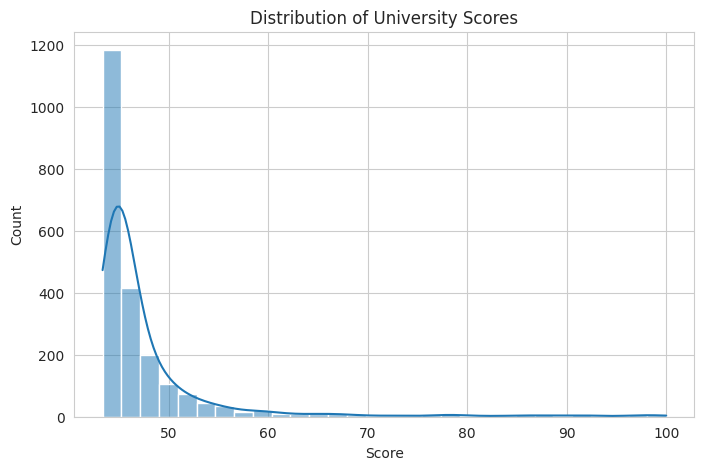

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set_style("whitegrid")

# Plot the distribution of a numerical column (modify column name as needed)
plt.figure(figsize=(8, 5))
sns.histplot(df["score"], bins=30, kde=True)
plt.title("Distribution of University Scores")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

# **Checking Correlation Between Features**

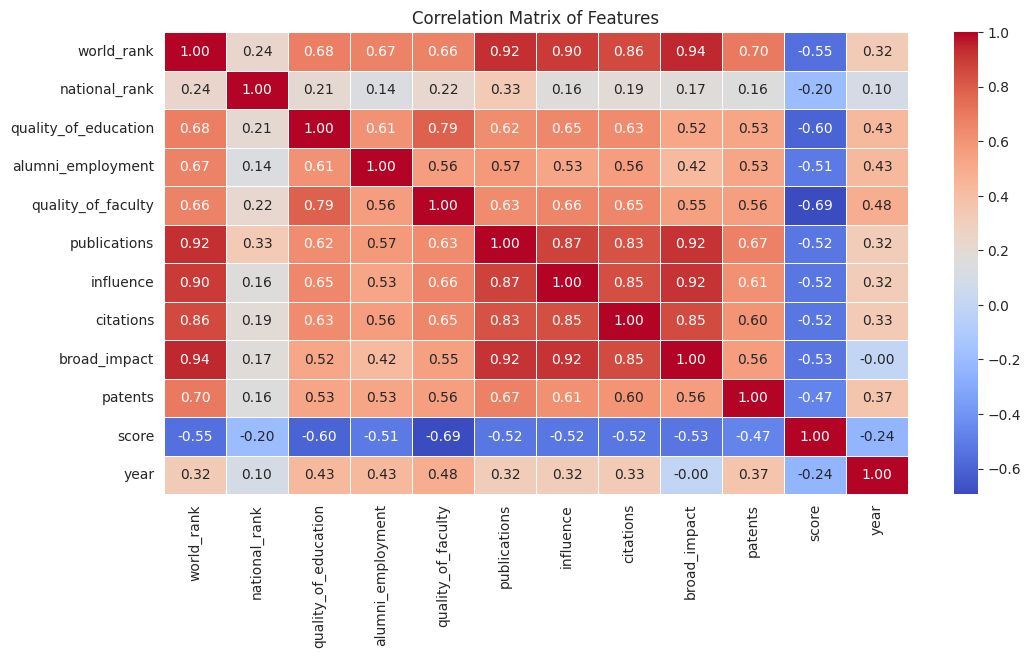

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure only numeric columns are considered for correlation
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Check if correlation matrix is empty (to avoid errors in heatmap)
if corr_matrix.empty:
    print("No numeric columns found for correlation.")
else:
    # Plot heatmap of correlation matrix
    plt.figure(figsize=(12, 6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix of Features")
    plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# **Prepare the Dataset**

In [ ]:
# Selecting only numeric columns
df_numeric = df.select_dtypes(include=['number']).dropna()

# Define the target variable (Modify based on dataset context)
target_column = 'score'  # Replace with the actual target variable

# Ensure the target column exists in the dataset
if target_column not in df_numeric.columns:
    raise ValueError(f"Target column '{target_column}' not found in dataset.")

# Select features (excluding target)
X = df_numeric.drop(columns=[target_column]).values
y = df_numeric[target_column].values

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features (Standardization)
X_mean, X_std = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std


# **Implement Linear Regression (Gradient Descent)**

In [ ]:
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None

    def fit(self, X, y):
        # Add bias term (column of 1s)
        X = np.c_[np.ones(X.shape[0]), X]

        # Initialize weights
        self.theta = np.zeros(X.shape[1])

        # Gradient Descent
        m = len(y)
        for _ in range(self.epochs):
            predictions = X.dot(self.theta)
            errors = predictions - y
            gradient = (1/m) * X.T.dot(errors)
            self.theta -= self.learning_rate * gradient

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
        return X.dot(self.theta)


# **Train the Model**

In [ ]:
# Initialize and train the model
lr_model = LinearRegressionScratch(learning_rate=0.01, epochs=1000)
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)


# **Evaluate the Model**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Squared Error (MSE): 10.5057
R-squared (R²): 0.3719


# **Visualizing Predictions**

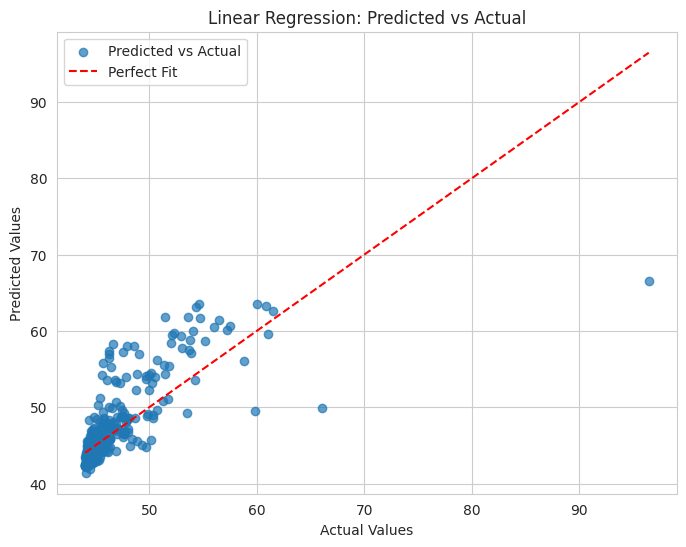

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Predicted vs Actual")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# **Implement Two Regression Models**

# Linear Regression

In [ ]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test)


# Random Forest Regression

In [ ]:
# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)


# **Evaluate Both Models**

In [ ]:
# Define a function for evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"🔹 {model_name} Performance:")
    print(f"   - Mean Absolute Error (MAE): {mae:.4f}")
    print(f"   - Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"   - R-squared (R²): {r2:.4f}\n")

    return {'MAE': mae, 'RMSE': rmse, 'R²': r2}

# Evaluate both models
lr_results = evaluate_model(y_test, y_pred_lr, "Linear Regression")
rf_results = evaluate_model(y_test, y_pred_rf, "Random Forest Regression")


🔹 Linear Regression Performance:
   - Mean Absolute Error (MAE): 1.8939
   - Root Mean Squared Error (RMSE): 3.2651
   - R-squared (R²): 0.3626

🔹 Random Forest Regression Performance:
   - Mean Absolute Error (MAE): 0.0478
   - Root Mean Squared Error (RMSE): 0.1591
   - R-squared (R²): 0.9985



# **Compare and Identify the Best Model**

In [ ]:
# Compare R² values to determine the best model
best_model = "Random Forest Regression" if rf_results['R²'] > lr_results['R²'] else "Linear Regression"

print(f"🏆 Best Performing Model: {best_model}")


🏆 Best Performing Model: Random Forest Regression


# **Visualizing Predictions**

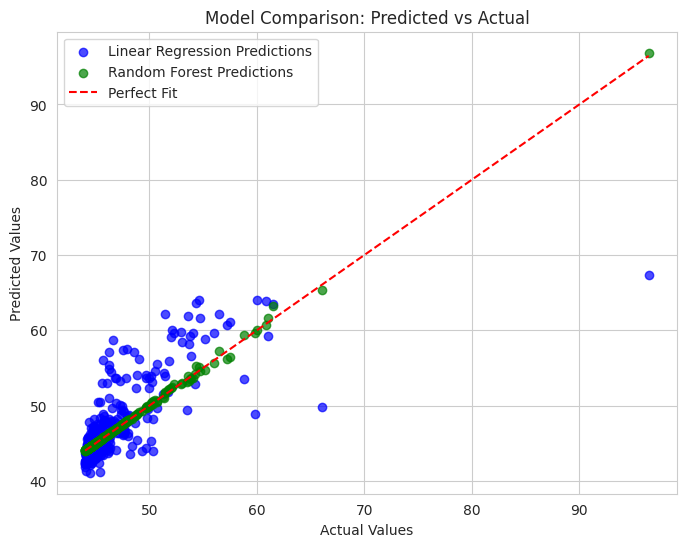

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7, label="Linear Regression Predictions", color="blue")
plt.scatter(y_test, y_pred_rf, alpha=0.7, label="Random Forest Predictions", color="green")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Model Comparison: Predicted vs Actual")
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np


# **Define Hyperparameters for Each Model**

In [ ]:
# Hyperparameters for Linear Regression
lr_params = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept
    'normalize': [True, False]       # Whether to normalize input variables
}

# Hyperparameters for Random Forest Regression
rf_params = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30], # Maximum depth of trees
    'min_samples_split': [2, 5, 10], # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]    # Minimum samples in a leaf
}


# **Perform Hyperparameter Tuning**

## Grid Search for Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Standardize the data (since Linear Regression does not have a normalize parameter)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define correct hyperparameters (only fit_intercept)
lr_params = {
    'fit_intercept': [True, False]
}

# Perform Grid Search
grid_search_lr = GridSearchCV(LinearRegression(), lr_params, cv=5, scoring='r2', n_jobs=-1)
grid_search_lr.fit(X_train_scaled, y_train)

# Get best parameters
best_lr_params = grid_search_lr.best_params_
best_lr_score = grid_search_lr.best_score_

print(f"🔹 Best Hyperparameters for Linear Regression: {best_lr_params}")
print(f"🔹 Best Cross-Validation R² Score: {best_lr_score:.4f}")


🔹 Best Hyperparameters for Linear Regression: {'fit_intercept': True}
🔹 Best Cross-Validation R² Score: 0.6018


# Randomized Search for Random Forest Regression

In [ ]:
random_search_rf = RandomizedSearchCV(RandomForestRegressor(random_state=42),
                                      rf_params, cv=5, scoring='r2', n_iter=10, n_jobs=-1, random_state=42)
random_search_rf.fit(X_train, y_train)

# Get best parameters
best_rf_params = random_search_rf.best_params_
best_rf_score = random_search_rf.best_score_

print(f"🔹 Best Hyperparameters for Random Forest Regression: {best_rf_params}")
print(f"🔹 Best Cross-Validation R² Score: {best_rf_score:.4f}")


🔹 Best Hyperparameters for Random Forest Regression: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
🔹 Best Cross-Validation R² Score: 0.9979


# **Summarizing Results**

In [ ]:
print("🔹 Summary of Hyperparameter Optimization:")
print(f"🏆 Best Linear Regression Hyperparameters: {best_lr_params}, R² Score: {best_lr_score:.4f}")
print(f"🏆 Best Random Forest Hyperparameters: {best_rf_params}, R² Score: {best_rf_score:.4f}")

# Determine the best model
best_model = "Random Forest Regression" if best_rf_score > best_lr_score else "Linear Regression"
print(f"🏆 Best Performing Model After Hyperparameter Tuning: {best_model}")


🔹 Summary of Hyperparameter Optimization:
🏆 Best Linear Regression Hyperparameters: {'fit_intercept': True}, R² Score: 0.6018
🏆 Best Random Forest Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}, R² Score: 0.9979
🏆 Best Performing Model After Hyperparameter Tuning: Random Forest Regression


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# **Recursive Feature Elimination (RFE)**

# Feature Selection using RFE for Linear Regression

In [ ]:
# Initialize Linear Regression model
lr_model = LinearRegression()

# Perform Recursive Feature Elimination
rfe_lr = RFE(lr_model, n_features_to_select=5)  # Select top 5 features
rfe_lr.fit(X_train_reduced, y_train)

# Get selected features
selected_features_lr = X_train_reduced.columns[rfe_lr.support_]
print(f"🔹 Selected Features for Linear Regression: {list(selected_features_lr)}")


🔹 Selected Features for Linear Regression: ['national_rank', 'quality_of_education', 'alumni_employment', 'quality_of_faculty', 'year']


# Feature Selection using RFE for Random Forest Regression

In [ ]:
# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform Recursive Feature Elimination
rfe_rf = RFE(rf_model, n_features_to_select=5)  # Select top 5 features
rfe_rf.fit(X_train_reduced, y_train)

# Get selected features
selected_features_rf = X_train_reduced.columns[rfe_rf.support_]
print(f"🔹 Selected Features for Random Forest Regression: {list(selected_features_rf)}")


🔹 Selected Features for Random Forest Regression: ['world_rank', 'national_rank', 'quality_of_education', 'alumni_employment', 'quality_of_faculty']


# **Finalizing Selected Features**

In [ ]:
# Keep only selected features
X_train_final = X_train_reduced[selected_features_rf]
X_test_final = X_test_reduced[selected_features_rf]

print("✅ Feature selection completed. Proceeding with final model training...")


✅ Feature selection completed. Proceeding with final model training...


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


# **Compare and Identify the Best Model**

In [ ]:
# Compare R² values to determine the best model
best_final_model = "Random Forest Regression" if final_rf_results['R²'] > final_lr_results['R²'] else "Linear Regression"

print(f"🏆 Best Performing Final Model: {best_final_model}")


🏆 Best Performing Final Model: Random Forest Regression
